In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

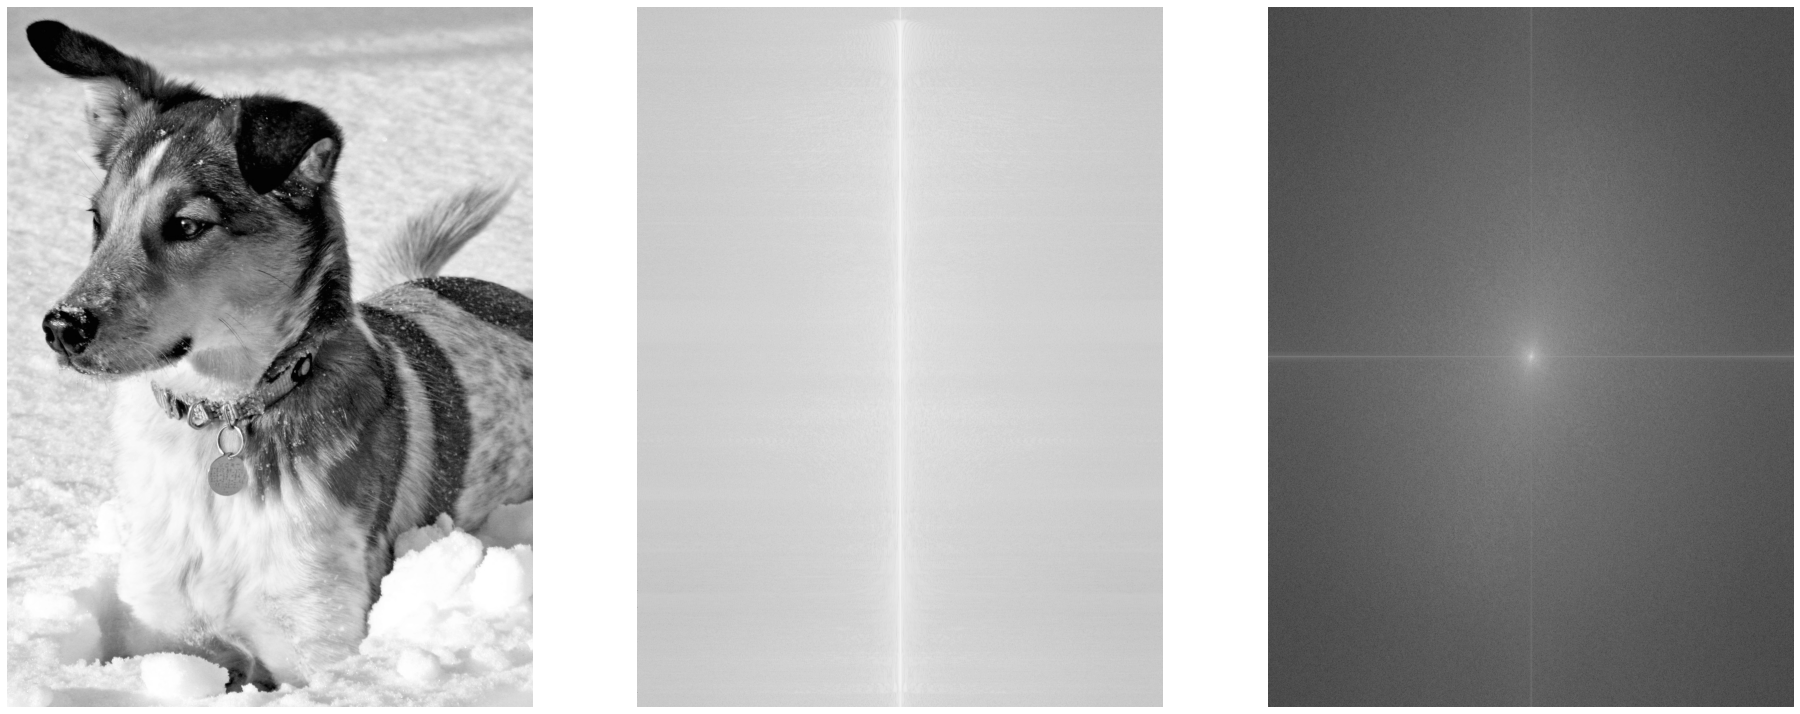

In [5]:
plt.rcParams['figure.figsize'] = [32, 24]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('DATA','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

fig,axs = plt.subplots(1,3)

# Plot image
img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

# 
# Compute row-wise FFT
# 
Cshift = np.zeros_like(B,dtype='complex_')
C = np.zeros_like(B,dtype='complex_')

for j in range(B.shape[0]):
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(B[j,:]))
    C[j,:] = np.fft.fft(B[j,:])

# Plot row-wise fft image
img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

# 
# Compute column-wise FFT
# 
D = np.zeros_like(C)
for j in range(C.shape[1]):
    D[:,j] = np.fft.fft(C[:,j])

# plot column-wise on row-wise image
img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()

# Much more efficient to use fft2
D = np.fft.fft2(B)

img.imsave("RESULT/

In [6]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude


### FFT applied image matrix
The following is the result we obtain by applying fft2 on the greyscale image

In [7]:
Bt

array([[ 5.02770615e+08       +0.j        ,
         4.10808697e+07 -7990238.64173695j,
        -6.03969060e+05 +1512423.15581528j, ...,
         1.02186357e+07+10624279.23129161j,
        -6.03969060e+05 -1512423.15581528j,
         4.10808697e+07 +7990238.64173695j],
       [ 4.78009849e+07+37768263.25906076j,
         2.51287528e+07 +7034343.41455035j,
        -8.59337327e+06 +8582138.33736305j, ...,
         7.51386138e+06-16073908.33604186j,
         8.78733597e+04 +3820906.60070193j,
        -4.00754896e+07-48703744.14537659j],
       [-1.44472824e+07+15938336.44951182j,
        -2.68747153e+07  -634535.35980813j,
         6.94773860e+06+12057371.76084811j, ...,
         1.65154075e+05 -4163652.13415013j,
         6.20125306e+06 -8312748.50350389j,
        -4.93227438e+06 +2467863.91484734j],
       ...,
       [-6.75189694e+05 -4866624.26809071j,
        -6.87978281e+06-28602324.99858147j,
        -1.14724520e+07 +5652626.67641557j, ...,
         1.37697548e+06 -7303219.63659257

In [8]:
Btsort

array([3.64412932e+00, 3.64412932e+00, 4.18772208e+00, ...,
       6.30721774e+07, 6.30721774e+07, 5.02770615e+08])

Threshold value for 100% of FFT: 3.6441293159950634
Threshold value for 5.0% of FFT: 34431.332782402555
Threshold value for 1.0% of FFT: 101837.5523225116
Threshold value for 0.2% of FFT: 320272.18130532576


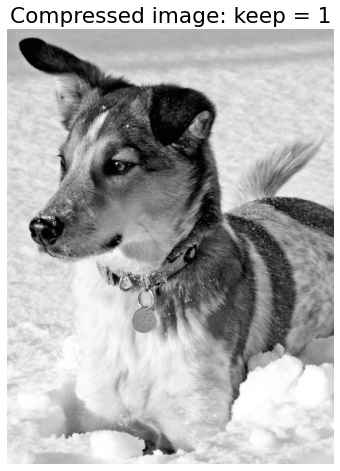

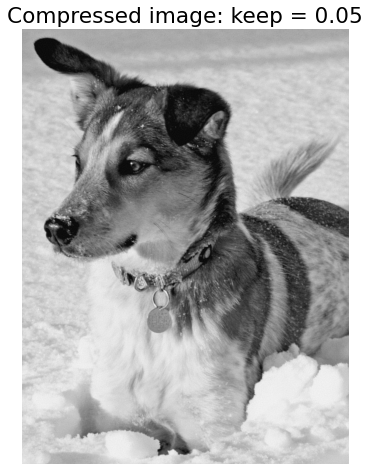

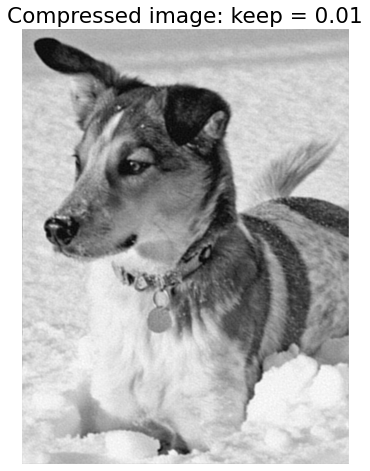

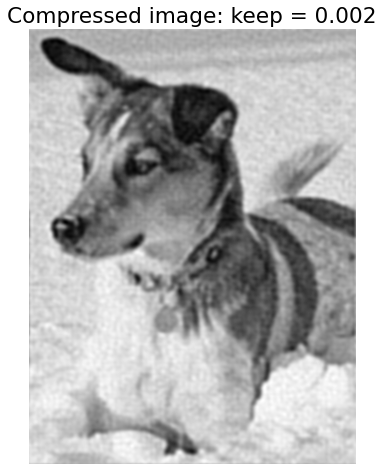

In [9]:
# Zero out all small coefficients and inverse transform
for keep in (1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    print(f"Threshold value for {keep*100}% of FFT: {thresh}")
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.imsave(f'RESULT/dog_{keep}.jpg', Alow, cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))
    

In [10]:
# Checking errors

# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [11]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def psnr(mse):
    # calculating psnr using mse     
    if mse != 0: # to avoid divide by 0 error if mse is 0
        return 20*math.log(mse, 10)*((255^2)/mse)
    return 0  

def ssimilarity(imageA, imageB):
    # converting to greyscale     
    iA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    iB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    return ssim(iA,iB)
    
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssimilarity(imageA, imageB)
    p = psnr(m)

    print(title, "\t=> MSE: %.2f, SSIM: %.2f, PSNR: %.2f" % (m, s, p))


In [12]:
ori = cv2.imread(os.path.join('RESULT','dog_1.jpg'))
ori5 = cv2.imread(os.path.join('RESULT',"dog_0.05.jpg"))
ori2 = cv2.imread(os.path.join('RESULT',"dog_0.002.jpg"))
ori1 = cv2.imread(os.path.join('RESULT',"dog_0.01.jpg"))

compare_images(ori, ori, "Original vs Original Image")
compare_images(ori, ori5, "Original vs 5.0% of FFT")
compare_images(ori, ori1, "Original vs 1.0% of FFT")
compare_images(ori, ori2, "Original vs 0.2% of FFT")



Original vs Original Image 	=> MSE: 0.00, SSIM: 1.00, PSNR: 0.00
Original vs 5.0% of FFT 	=> MSE: 383.66, SSIM: 0.87, PSNR: 34.08
Original vs 1.0% of FFT 	=> MSE: 340.45, SSIM: 0.75, PSNR: 37.63
Original vs 0.2% of FFT 	=> MSE: 645.01, SSIM: 0.69, PSNR: 22.04


### Additional Images
Some more image samples

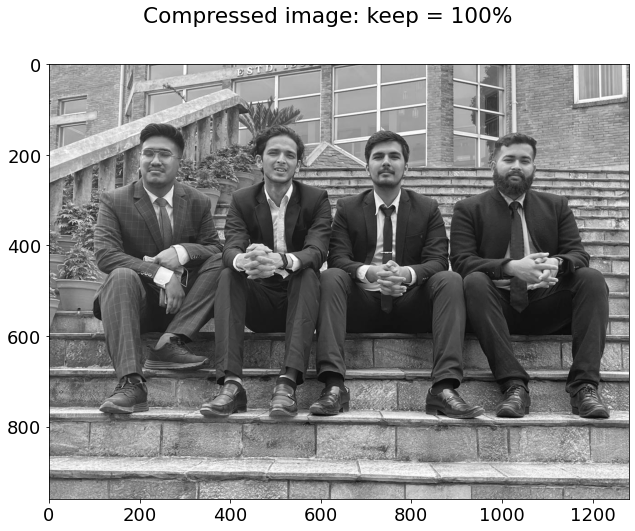

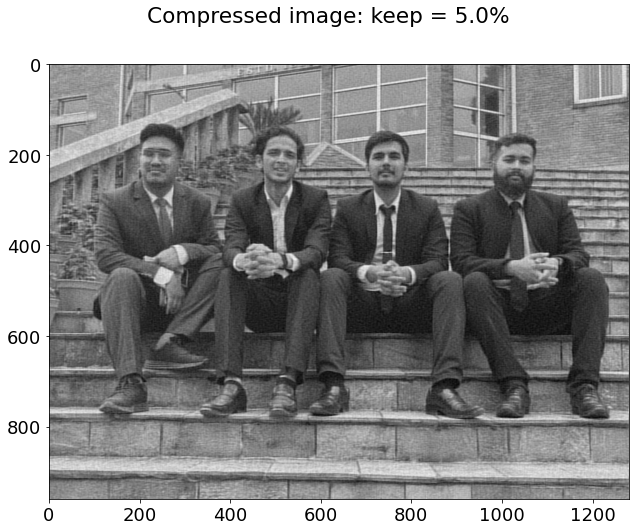

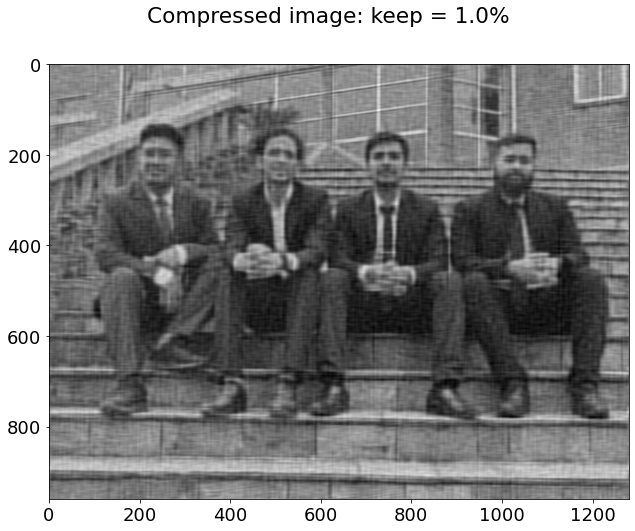

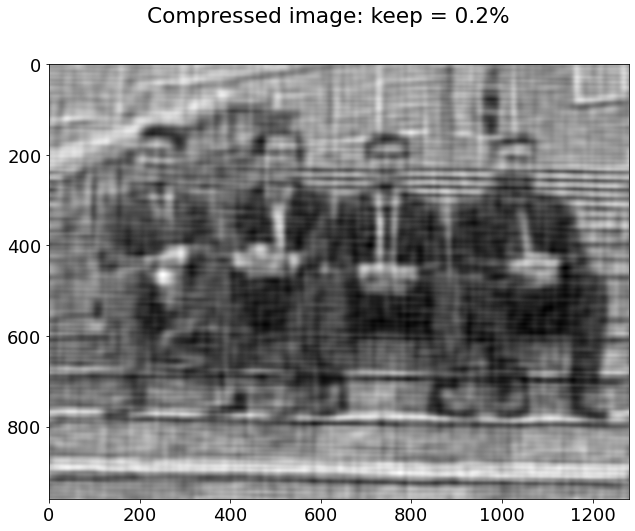

In [13]:
A = imread(os.path.join('DATA','godfathers.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.imsave(f'RESULT/godfathers_{keep}.jpg', Alow, cmap='gray')
    plt.suptitle(f'Compressed image: keep = {keep*100}%')
    

In [14]:
ori = cv2.imread(os.path.join('RESULT','godfathers_1.jpg'))
ori5 = cv2.imread(os.path.join('RESULT',"godfathers_0.05.jpg"))
ori2 = cv2.imread(os.path.join('RESULT',"godfathers_0.002.jpg"))
ori1 = cv2.imread(os.path.join('RESULT',"godfathers_0.01.jpg"))

compare_images(ori, ori, "Original vs Original Image")
compare_images(ori, ori5, "Original vs 5.0% of FFT")
compare_images(ori, ori1, "Original vs 1.0% of FFT")
compare_images(ori, ori2, "Original vs 0.2% of FFT")



Original vs Original Image 	=> MSE: 0.00, SSIM: 1.00, PSNR: 0.00
Original vs 5.0% of FFT 	=> MSE: 907.12, SSIM: 0.69, PSNR: 16.50
Original vs 1.0% of FFT 	=> MSE: 2374.26, SSIM: 0.49, PSNR: 7.19
Original vs 0.2% of FFT 	=> MSE: 2046.66, SSIM: 0.38, PSNR: 8.19


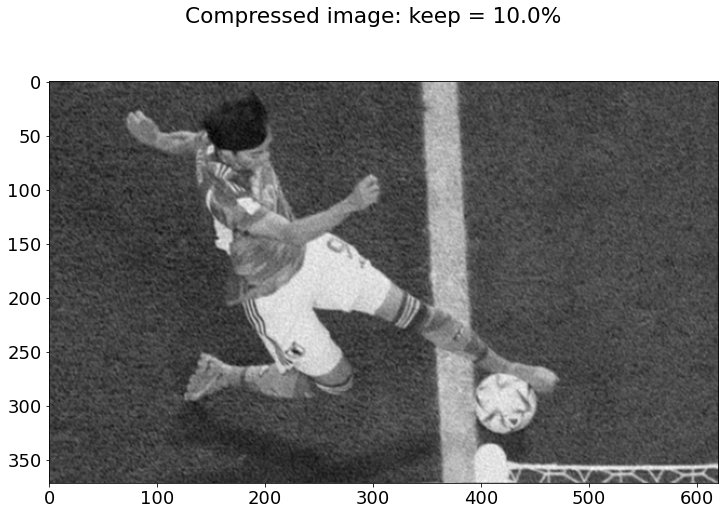

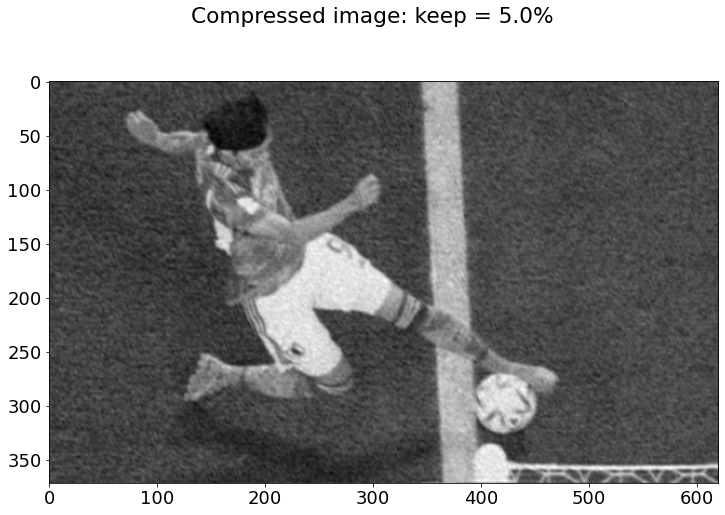

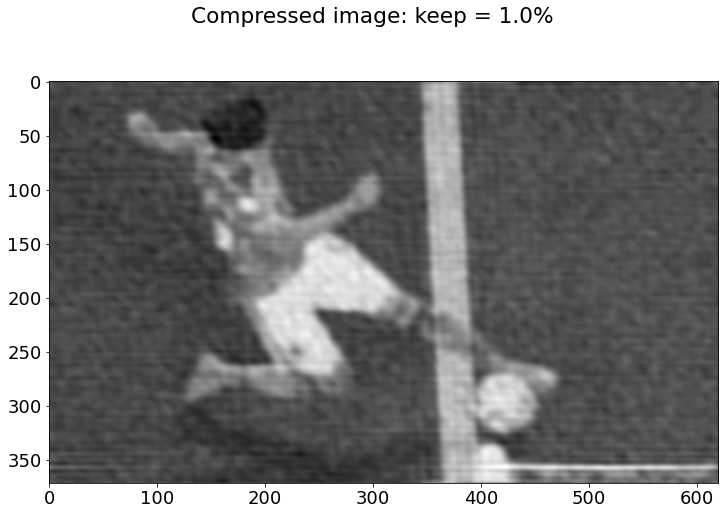

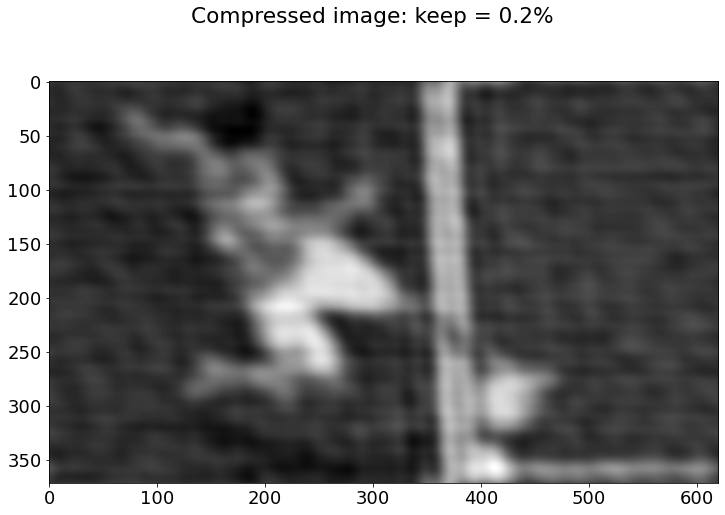

In [15]:
A = imread(os.path.join('DATA','japan.webp'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.suptitle(f'Compressed image: keep = {keep*100}%')

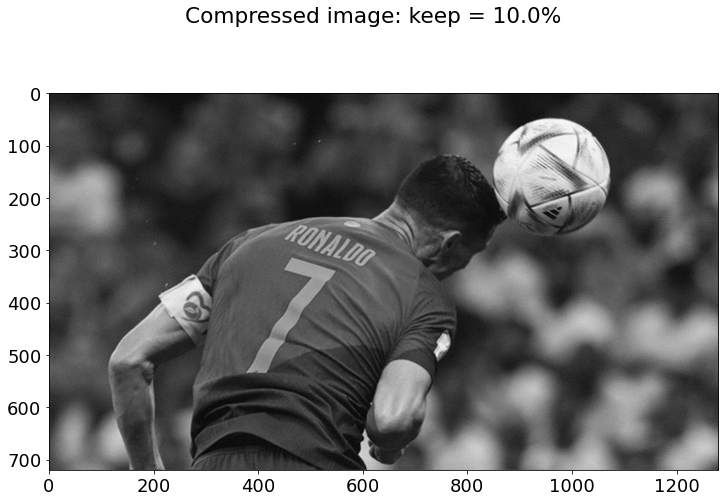

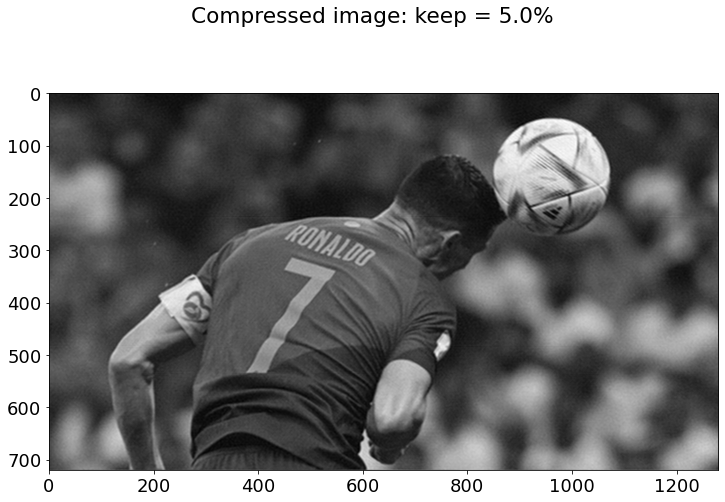

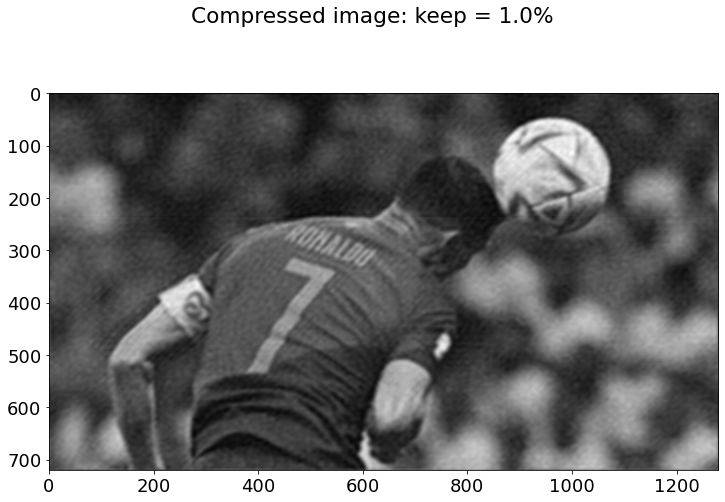

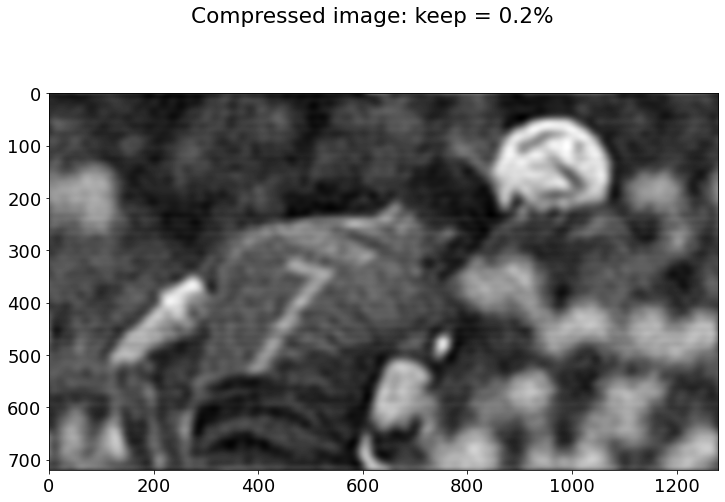

In [16]:
A = imread(os.path.join('DATA','ronaldo.jpeg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.suptitle(f'Compressed image: keep = {keep*100}%')
    